
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

### Integrantes
- Bosch, Daniela
- Gherra, Estefanía
- Iberra, Yanina
- Mantovani, Luciano
- Palacio Pastor, Natalí

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
type(boston)

sklearn.utils.Bunch

In [ ]:
print(boston['DESCR']) # descripción del dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston['data'].shape # matriz con los datos de entrada (atributos)

(506, 13)

In [ ]:
boston['target'][:3] # vector de valores a predecir

array([24. , 21.6, 34.7])

In [ ]:
boston['feature_names'] # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**1. ¿De qué se trata el conjunto de datos?**

El dataset Boston está incluido en la librería `sklearn`. Es un famoso conjunto de datos de la década de 1970.

Ofrece la mediana de precios de inmuebles en Boston a partir de algunas características geográficas, demográficas, y económicas que podrían influir en su valor. Algunos son la antigüedad del inmueble, la tasa de criminalidad en la zona, etc.

Se trata de un dataset de 506 registros y 14 características; de las cuales hay 13 numéricas/categóricas y 1 numérica a predecir (mediana).



---


**2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**

La variable objetivo a predecir es `MEDV`, que representa el valor de la mediana de las viviendas en miles de dólares, recordemos que el dataset es de la década del 70 (1978 exactamente) y contendrá valores de precios de esa época.

---


**3. ¿Qué información (atributos) hay disponibles para hacer la predicción?**

Como se puede apreciar con el resultado del atributo `boston['DESCR']`, se tienen:

- 13 características predictivas numéricas y categóricas.

*Información de atributos (en orden):*

- **CRIM**: Tasa de criminalidad per cápita por ciudad. (FBI - 1970)

- **ZN**: Proporción de suelo residencial para lotes de más de 25.000 pies cuadrados. (Metropolitan Area Planning Commission (1972))

- **INDUS**: Proporción de acres comerciales no minoristas por ciudad. (Vogt, Ivers, and Associates)

- **CHAS**: Variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario). (1970 US Census Tract maps)
        
- **NOX**: Concentración de óxidos nítricos (partes por 10 millones). (TASSIM)
        
- **RM**: Número medio de habitaciones por vivienda. (1970 US Census)
        
- **AGE**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940. (1970 US Census)
        
- **DIS**: Distancias ponderadas a cinco centros de empleo de Boston. (Schnare)
        
- **RAD**: Índice de accesibilidad a las autopistas radiales. (MIT Boston Project)
        
- **TAX**: Tasa de impuesto a la propiedad de valor total ($/$10,000). (Massachusetts Tax-payers Foundation (1970))
        
- **PTRATIO**: Proporción alumno-profesor por ciudad. (Mass. Dept. of Education (1971–1972))
        
- **B**: 1000(Bk - 0,63)^2, donde Bk es la proporción de negros por ciudad. (1970 US Census)
        
- **LSTAT**: Proporción de la población de estatus bajo (proporción de adultos sin algún tipo de educación secundaria y proporción de trabajadores masculinos clasificados como obreros). (1970 US Census)

---


**4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?**

- ZN: proporción de suelo residencial para lotes de más de 25.000 pies cuadrados. _Nos puede dar una idea de la densidad poblacional de la zona. Un departamento en el centro probalemente valga distinto que uno mas alejado._ 

- RM: número medio de habitaciones por vivienda. _Las casas con más habitaciones suelen tener mas valor._

- DIS: distancias ponderadas a cinco centros de empleo de Boston. _Sería interesante evaluar si esto influye o no en el precio, probablemente sí y también esté relacionada con ZN_

- RAD: índice de accesibilidad a las autopistas radiales. _Nos da una idea de la accesibilidad de la vivienda, y podría influir fuertemente en su valor._

- TAX: tasa de impuesto sobre la propiedad de valor total por 10.000 dólares. _Nos sirve porque da un dato numérico relacionado a un valor previamente asignado (por el gobierno) de la propiedad._



---


**5 . ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.**

Dentro del dataset, existe un grupo de variables que hablan sobre condiciones que afectan directamente a la demografia del lugar. Características del poder adquisitivo, color de piel, cantidad de denuncias policiales en la zona. Si bien sería posible encontrar relaciones entre estas variables, la relación numérica no necesariamente justifica los razonamientos detrás de las mismas. 

Los mecanismos con los que se obtienen estas variables (censos, denuncias) son particularmente sensibles de información y parten de una serie de categorizaciones y suposiciones muy fuertes, que no consideramos necesarias y son inapropiadas para predecir el precio de una vivienda.

**B: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad. (1970 US Census)**

Scikit-learn alberga un conjunto de datos que utiliza el color de la piel para predecir el precio de una vivienda (sin incluir al resto de los grupos étnicos), es claramente inapropiado. Imaginemos el daño que se puede hacer si la gente empieza a considerar los algoritmos "justos" o "éticos" por el mero hecho de utilizar un paquete. Tal vez es propio del momento histórico del censo sobre el que se basa el dataset (década del 70, donde existía un alto porcentaje de violencia interracial).

**LSTAT: Proporción de la población de estatus bajo (proporción de adultos sin algún tipo de educación secundaria y proporción de trabajadores masculinos clasificados como obreros). (1970 US Census)**

Lo mismo sucede con contemplar para predecir el precio de la vivienda, el nivel de estudio o tipo de trabajo de los vecinos. Aunque entendemos que aún actualmente es un factor que impacta en el tipo de vivienda de los vecinos y por lo tanto, en el precio de las viviendas. Esta variable representa también un riesgo, ya que la demografía de las ciudades cambia todo el tiempo. Cuidado con querer predecir el valor de un inmueble en 2021 con datos de los 70s, ya que pudo haber fenómenos como el de urbanización y gentrificación que cambian las condiciones y características del lugar.

**CRIM: Tasa de criminalidad per cápita por ciudad. (FBI - 1970)**

En cuanto a la tasa de criminalidad, ¿qué se define por crimen o criminalidad? Existe una concepción dada por construcciones de sentido común donde se piensa la criminalidad como homicidios o como inseguridad. Pero existen diferentes tipos de violencias y delitos: fraudes millonarios y crímenes de guante blanco que afectan a muchísimas personas y no se suelen incluir en esta construcción social. Se debe ser cuidadoso, en especial teniendo en cuenta la presencia de la columna `B`, en generar predicciones con sesgos históricamente discriminatorios y racistas.


#### Algunos conclusiones sobre esta sección:

La suposición sobre que variables influyen más sobre el precio de una vivienda resulta ser muy complicada. Intentamos realizar esta selección tratando de incLuir siempre el menor sesgo posible, aún sabiendo que esto no es verdaderamente alcanzable. Al menos, podemos optar por aquellas variables que tienen una influencia más generalizada sobre la población, y tratar de no condicionar sobre variables que tienen aspectos racistas, de clase, o simplemente son inapropiadas para estas predicciones.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

Crearemos un dataframe que contenga las características y variable objetivo a predecir como columnas.

In [ ]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df["MEDV"] = boston.target
print(boston_df.shape)
boston_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Primero vamos a graficar la distribución de la variable objetivo `MEDV`. Utilizaremos la función displot de la biblioteca `Seaborn`.

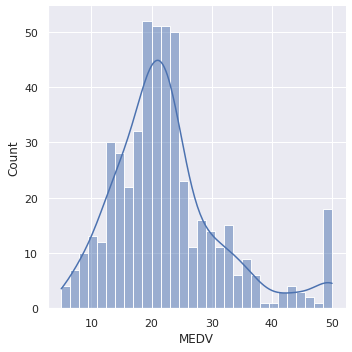

In [ ]:
sns.displot(boston_df['MEDV'], bins=30, kde=True)
plt.show()

Vemos que los valores del `MEDV` se distribuyen casi normalmente con pocos valores atípicos.

A continuación, creamos una matriz de correlación que mide las relaciones lineales entre las variables. La matriz de correlación se puede generar utilizando la función `.corr()` de la biblioteca `Pandas`. Utilizaremos la función `.heatmap()` de la biblioteca `Seaborn` para graficar la matriz de correlación.

- Al resolver un problema de regresión lineal, cada característica debe ser independiente entre sí, si hay alguna correlación entre dos variables independientes, entonces conduce a un exceso de ajuste del modelo (overfitting), por lo que con la ayuda del mapa de calor se busca identificar todas las características que muestran una fuerte correlación entre sí, y eliminarlas antes de realizar el modelo.
- También tratamos de extraer todas las características que tienen una amplia correlación con la variable objetivo. Porque, si la característica está fuertemente correlacionada con la variable a predecir, entonces esperaríamos una mejor predicción.

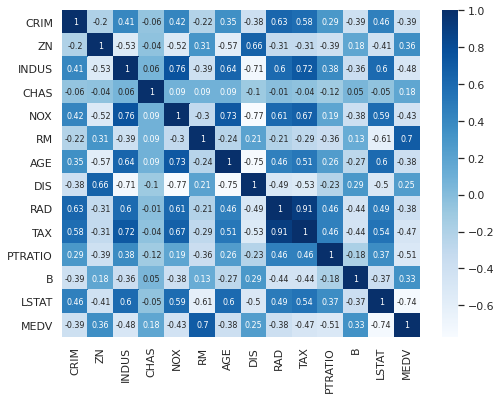

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues', annot_kws = {"size": 8});

- Al observar la matriz de correlación, podemos ver que `RM` tiene una fuerte correlación positiva con `MEDV` (0,7), mientras que `LSTAT` tiene una alta correlación negativa con `MEDV` (-0,74). Si bien esta última podría ser incluida para entrenar el modelo, no deberíamos  por dilemas éticos mencionados anteriormente.

- Las características `RAD` y `TAX` tienen una correlación de 0,91, indicando una correlación fuerte entre sí. Por lo tanto no deberíamos seleccionar estas dos características juntas para entrenar el modelo.

  Lo mismo ocurre con las características:

  `DIS` y `NOX`, que tienen una correlación de -0,77;
  
  `DIS` y `AGE`, que tienen una correlación de -0,75 y

  `DIS` y `INDUS`, que tienen una correlación de -0,71.
 

**Analicemos cómo las características están relacionadas con el valor objetivo, el precio de las viviendas.**

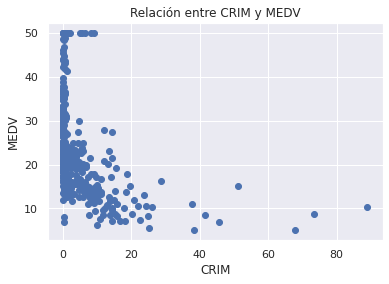

<Figure size 576x432 with 0 Axes>

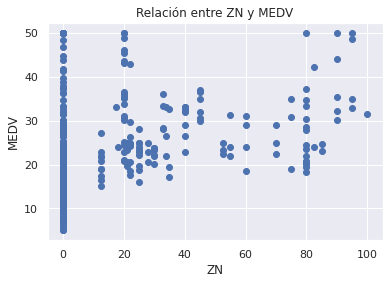

<Figure size 576x432 with 0 Axes>

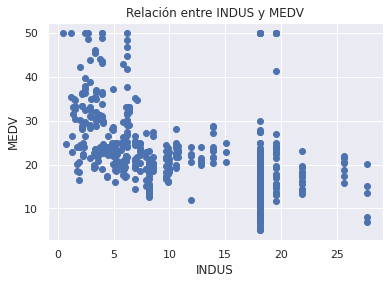

<Figure size 576x432 with 0 Axes>

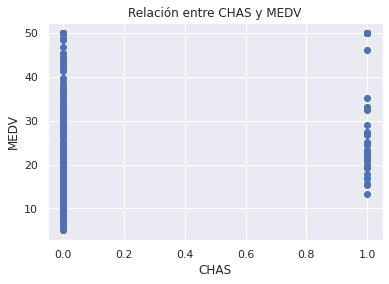

<Figure size 576x432 with 0 Axes>

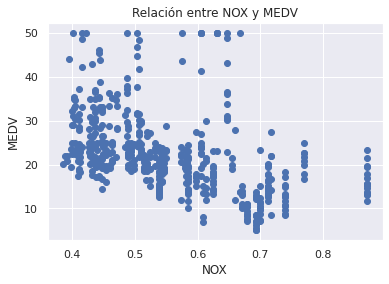

<Figure size 576x432 with 0 Axes>

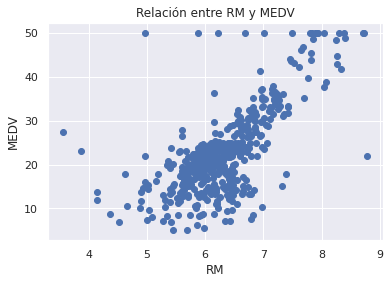

<Figure size 576x432 with 0 Axes>

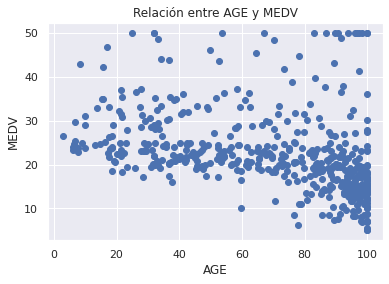

<Figure size 576x432 with 0 Axes>

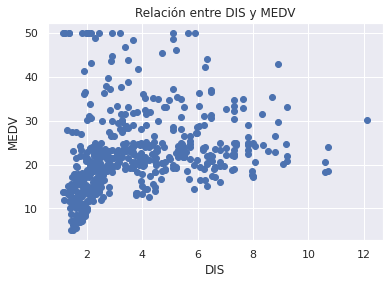

<Figure size 576x432 with 0 Axes>

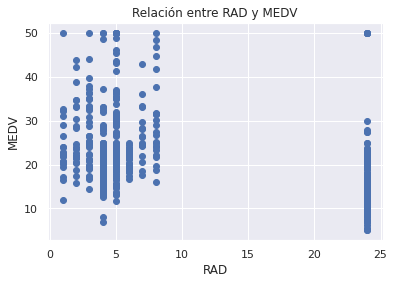

<Figure size 576x432 with 0 Axes>

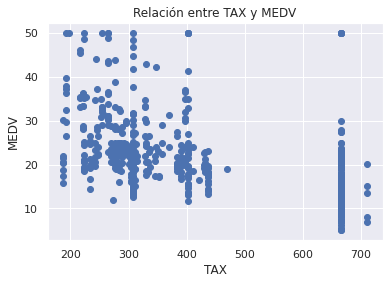

<Figure size 576x432 with 0 Axes>

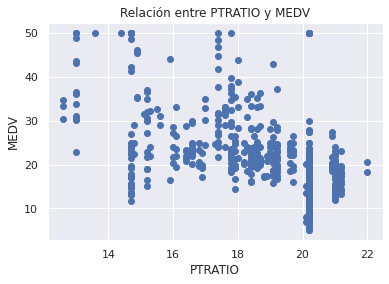

<Figure size 576x432 with 0 Axes>

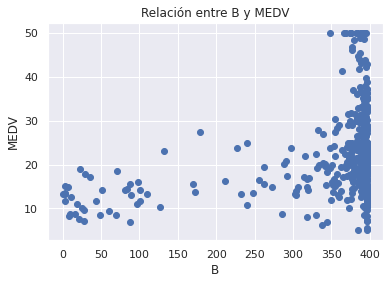

<Figure size 576x432 with 0 Axes>

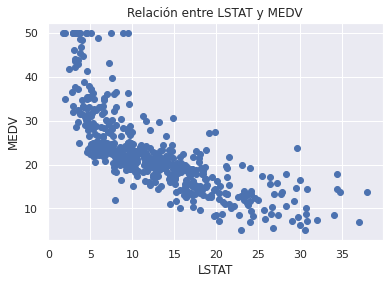

<Figure size 576x432 with 0 Axes>

In [ ]:
features = (boston_df.drop('MEDV', axis=1)).columns
target = boston_df['MEDV']

for i, col in enumerate(features):
    plt.figure(figsize=(6, 4))
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title('Relación entre ' + col + ' y MEDV')
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()
    plt.tight_layout();

Observaciones:


**Relación entre CRIM y MEDV**

Tasa de criminalidad por zona. Es difícil sacar conclusiones de esta variable. Una tasa baja de criminalidad da para valores de todo tipo en MEDV, y los datos con mucha criminalidad parecen outliers. Sumandole la cuestión etica, se hace evidente que habría que descartarla. 

**Relación entre ZN y MEDV**

ZN contiene datos sobre la proporcion de suelo resdencial para lotes de mas de 25.000 pies. Estas proporciones parecen tomar valores fijos (basandonos en los saltos), para los que MEDV se distribuye de una manera irregular entre 10 y 50. Menor a 10 unicamente para ZN=0. Sería una variable a incluir en el modelo para ver su impacto en la predcción.

**Relación entre INDUS y MEDV**

INDUS: Proporcion de acres comerciales no minoristas en la ciudad. La variable toma algunos valores fijos mayores a 15, con mayor esparcimiento para valores menores. MEDV toma valores mas altos para los valores de INDUS mas chicos. Por lo cual sería interesante incluirla en el modelo.

**Relación entre CHAS y MEDV.**

CHAS es categorica e indica si la casa limita con el rio Charles o no. Parece haber mas datos de casas que no limitan con el rio, lo cual tiene sentido. Ademas, hay mayor variabilidad de MEDV para estos casos. Y las propiedades que limitan con el río están por encima del valor 10 MEDV, pudiendo tener un impacto en el precio de la vivienda, por lo que deberíamos analizarla en el modelo.

**Relación entre NOX y MEDV**

Concentración de óxidos nítricos en ppm. MEDV parece disminuir conforme a aumenta el valor de esta variable. Sería una variable candidata a incluir en el modelo.

**Relación entre RM y MEDV**

Número medio de habitaciones por vivienda. Es más evidente en esta gráfica una cierta tendencia a subir el precio conforme aumenta el numero de habitaciones. Esto indica que puede influir linealmente en MEDV.

**Relación entre AGE y MEDV**

Proporción de unidades ocupadas por sus propietarios construidas antes de 1940. Hay una tendencia con mucha variabilidad a bajar el valor de MEDV conforme aumenta AGE. Además, hay una concentración muy alta de casos donde el age es muy alto y MEDV no supera el valor 20. A pesar de tener potencial de aportar informacion, en concepto la variable adjunta mas de un factor y es dificil entender la intuición detras de la misma, por lo que no concluimos que sea determinante para el modelo.


**Relación entre DIS y MEDV**

Distancias ponderadas a cinco centros de empleo de Boston. Parece haber una concentración en DIS y MEDV de bajo valor, esparciéndose para valores más grandes de ambos valores. Se incluiría en el modelo para su análisis.

**Relación entre RAD y MEDV**

Indice de accesibilidad a las autopistas radiales. RAD parece tomar valores fijos o discretos, para los que MEDV se distribuye con distintos grados de variabilidad. Existe un valor extremo de RAD para los que se concentra una cantidad significativa de casos, con un promedio de MEDV de menor valor a los RAD entre 0 y 10. Se incluiría en el modelo para su análisis.

**Relación entre TAX y MEDV**

Tasa de impuesto a la propiedad de valor total.
Los puntos estan esparcidos de manera dispersa para valores de TAX entre 200 y 500. TAX parece tomar algunos valores más frecuentemente que otros (varias modas). Existen dos valores extremos con TAX superior a 600 para los que MEDV llega a tomar los valores más bajos, y en promedio es más bajo a los otros valores inferiores de TAX. Similar al caso con RAD. Se incluiría en el modelo para su análisis.

**Relación entre PTRATIO y MEDV**

Proporción de alumno-profesor por ciudad. Es difícil determinar de manera intuitiva el valor de la relación entre ambas variables. Aunque se visualiza cierta disminución de MEDV a medida que aumenta PTRATIO, se observa mucha variabilidad y no existe una relación clara entre ellas.

**Relación entre B y MEDV**

Proporción de población de piel negra de la ciudad. La mayoría de los casos estan agrupados en valores altos de B. Para valores de B más bajos, MEDV toma valores entre 0 y 20. incrementando a medida que aumenta B. Debido a esta variabilidad y por razones éticas, no se incluiría esta variable en el modelo.

**Relación entre LSTAT y MEDV**

Proporción de la población de estatus bajo. Hay una tendencia descendiente marcada pero con variabilidad considerable para MEDV conforme aumenta LSTAT. No se incluiría en el modelo por cuestiones éticas por más que presenta una relación lineal.

#### Selección de variables

El análisis visual de la relación de cada variable nos da una idea de la capacidad de predicción que se tiene sobre las medianas de los precios del conjunto de prueba. Éstos análisis no son necesariamente finales y sería interesante probar distintos modelos usando las variables que no pueden determinarse con seguridad si son útiles o no, ya sea por su comportamiento con respecto a las medianas de entrenamiento o su intuición lógica detrás de la variable.

A continuación, listamos aquellas variables que necesariamente serían incluidas en el modelo por presentar una relación fuerte con la mediana, y además tener una relación intrínseca apropiada con el precio de una vivienda: 

  - RM
  - DIS

Las siguientes variables también podrían ser consideradas dentro del modelo para determinar su uso viendo las distintas métricas de predicción finales:

 - INDUS
 - NOX
 - CHAS
 - RAD
 - TAX
 - PTRATIO
 - ZN

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Selección del atributo.

feature = 'RM'  
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# 2. Instanciar y entrenar.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train_f, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 3. Predecir y evaluar.

y_train_pred = lin_model.predict(X_train_f)
y_test_pred = lin_model.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

train_R2_error = r2_score(y_train, y_train_pred)
test_R2_error = r2_score(y_test, y_test_pred)

print('Train MSE: {}'.format(train_error.round(2))) # no está en la misma unidad que la variable precio
print('Test MSE: {} \n'.format(test_error.round(2)))

print('Train RMSE: {}'.format(np.sqrt(train_error).round(2))) # con la raíz de MSE pasamos a tener el error en la misma unidad que los datos (un error de 6 sobre un rango que va de 0 a 50, puede considerarse "aceptable/bajo")
print('Test RMSE: {}\n'.format(np.sqrt(test_error).round(2)))

print('Train R2: {}'.format(train_R2_error.round(2)))
print('Test R2: {}\n'.format(test_R2_error.round(2)))

Train MSE: 42.82
Test MSE: 46.91 

Train RMSE: 6.54
Test RMSE: 6.85

Train R2: 0.5
Test R2: 0.42



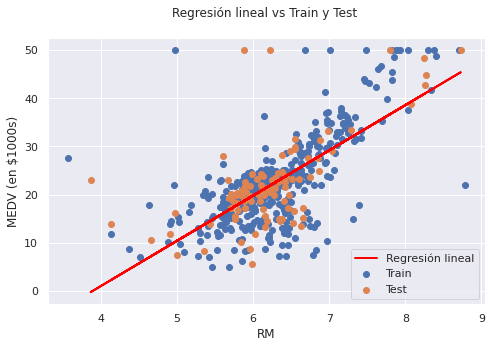

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(X_train_f, y_train, label="Train")
plt.scatter(X_test_f, y_test, label="Test")
plt.plot(X_test_f, y_test_pred, color = 'red', lw=2, label="Regresión lineal") # '--k'
#plt.plot(X_train_f, y_train_pred, color = 'black', lw=2, label="Train Model") # '--k'
plt.axis('tight')
plt.title("Regresión lineal vs Train y Test \n")
plt.legend()
plt.xlabel(feature)
plt.ylabel('MEDV (en $1000s)')
plt.tight_layout()

**5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.**

- No hay una gran diferencia entre el error cuadrático medio en train (42.82) y test (46.91), por lo que se puede decir que el modelo no está sobreajustado.
- Al observar la recta de la regresión lineal en el gráfico, junto a los datos de train y test, vemos los valores predichos por el modelo y los valores reales del conjunto de datos, parece que el modelo es bastante bueno en sus predicciones, aunque se observan alejados de la recta, sobre todo aquellos valores de `MEDV` que se encuentran cercanos al 50. El modelo no es exacto, pero se aproxima bastante. Los valores de train y test están cercanos a la recta de la regresión lineal modelada.
- Idealmente, el gráfico de dispersión del modelo con las predicciones en train y test debería asemejarse a una línea. Como nuestro modelo lineal no se ajusta perfectamente, el gráfico de dispersión no es exactamente lineal.
- El valor de $R^2$ obtenido cercano a 0.5, significa que el modelo capta con éxito alrededor del 50% de la variación de la variable objetivo.
- El error cuadrático medio (MSE) es una medida de la calidad de un modelo, siempre es no negativo, y los valores más cercanos a cero indican un mejor ajuste. En nuestro modelo, la función de error cuadrático medio devuelve un valor de aproximadamente 46.91 en el conjunto de test, éste valor no está en la misma unidad que la variable objetivo. Esto es bueno para empezar, pero habría que probar otros modelos o variar la selección de características para intentar mejorar las métricas. Si nuestro modelo hubiera predicho el valor exacto de los valores reales, la función de error cuadrático medio habría devuelto un valor de 0.
- Calculamos el RMSE, para obtener una medida de error en la misma unidad que la variable objetivo, obteniendo un RMSE de aproximadamente 6 para todo el conjunto de datos (train y test), lo cual nos indica que la regresión lineal tiene un margen de error de &#177; 6 (en una escala que va del 0 al 50 expresada en miles de dólares, por lo tanto sería 6*$1000).

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

**1. Regresión polinomial para varios grados de polinomio**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # 1.1 Instanciar y entrenar una regresión polinomial para varios grados
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # 1.2 Predecir y calcular el error en entrenamiento y evaluación. Imprimir los valores.
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    train_error = mean_squared_error(y_train, y_train_pred).round(2)
    test_error = mean_squared_error(y_test, y_test_pred).round(2)
    train_RMSE_error = np.sqrt(train_error).round(2)
    test_RMSE_error = np.sqrt(test_error).round(2)
    
    print(f"Grado {degree} -", \
          f"Train MSE: {train_error} -", f"Test MSE: {test_error} -", \
          f"Train RMSE: {train_RMSE_error} -", f"Test RMSE: {test_RMSE_error}")

    # 1.3 Guardar los errores (MSE) en una lista:
    train_errors.append(train_error)
    test_errors.append(test_error)

Grado 0 - Train MSE: 85.14 - Test MSE: 81.58 - Train RMSE: 9.23 - Test RMSE: 9.03
Grado 1 - Train MSE: 42.82 - Test MSE: 46.91 - Train RMSE: 6.54 - Test RMSE: 6.85
Grado 2 - Train MSE: 37.75 - Test MSE: 39.79 - Train RMSE: 6.14 - Test RMSE: 6.31
Grado 3 - Train MSE: 36.4 - Test MSE: 39.83 - Train RMSE: 6.03 - Test RMSE: 6.31
Grado 4 - Train MSE: 34.81 - Test MSE: 41.55 - Train RMSE: 5.9 - Test RMSE: 6.45
Grado 5 - Train MSE: 33.13 - Test MSE: 41.04 - Train RMSE: 5.76 - Test RMSE: 6.41
Grado 6 - Train MSE: 33.13 - Test MSE: 41.01 - Train RMSE: 5.76 - Test RMSE: 6.4
Grado 7 - Train MSE: 33.06 - Test MSE: 42.39 - Train RMSE: 5.75 - Test RMSE: 6.51
Grado 8 - Train MSE: 33.06 - Test MSE: 42.4 - Train RMSE: 5.75 - Test RMSE: 6.51
Grado 9 - Train MSE: 32.85 - Test MSE: 46.04 - Train RMSE: 5.73 - Test RMSE: 6.79


**2. Grafique las curvas de error en términos del grado del polinomio.**

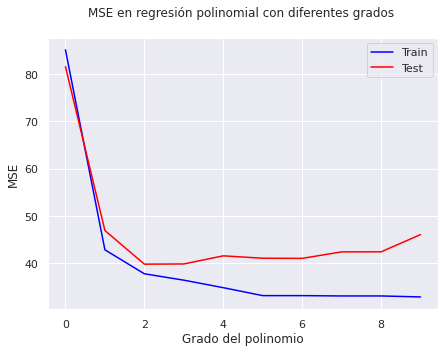

In [ ]:
# 2. Gráfica de las curvas de error

plt.figure(figsize=(7, 5))
plt.plot(degrees, train_errors, color="blue", label="Train")
plt.plot(degrees, test_errors, color="red", label="Test")
plt.title("MSE en regresión polinomial con diferentes grados \n")
plt.legend()
plt.xlabel("Grado del polinomio")
plt.ylabel("MSE")
plt.show()

**4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.**

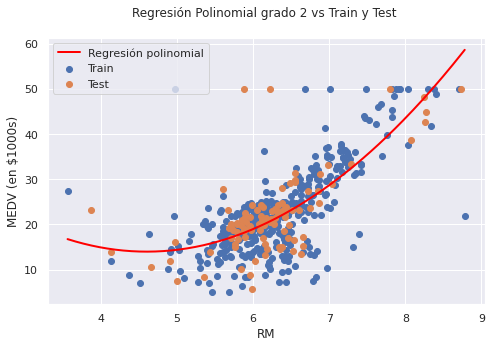

In [ ]:
# 4. Reconstruir mejor modelo
best_degree = 2
pf = PolynomialFeatures(best_degree)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train_f, y_train)
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

# Graficar el mejor modelo
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(7, 5))
plt.scatter(X_train_f, y_train, label="Train")
plt.scatter(X_test_f, y_test, label="Test")
plt.plot(x, model.predict(x), color="red", lw=2, label="Regresión polinomial")
plt.axis('tight')
plt.title("Regresión Polinomial grado 2 vs Train y Test \n")
plt.legend()
plt.xlabel(feature)
plt.ylabel('MEDV (en $1000s)')
plt.tight_layout()
plt.show()

**Resumen de errores para polinomio de grado 2**

MSE
- Train: 37.75
- Test: 39.79

RMSE
- Train: 6.14
- Test: 6.31


Los valores de MSE o RMSE para el modelo de regresión polinómica de grado 2 son menores a los de la regresión lineal, sin embargo no podríamos decir con firmeza que la mejora es significativa. Dicho esto, debemos tener en cuenta que se usó una sola variable, y los resultados obtenidos son un buen comienzo para tener una idea de los MSE que se obtienen en la predicción usando modelos polinómicos.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

**1. Seleccione dos o tres atributos entre los más relevantes encontrados en el ejercicio 2.**

Se seleccionan las variables `DIS` y `RM` en las cuales se apreciaba una relación casi lineal con respecto al precio `MEDV`.

**2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.**

In [ ]:
# Elegimos los atributos:
feature_1 = 'RM'
feature_2 = 'DIS'
selector = (boston['feature_names'] == feature_1) | (boston['feature_names'] == feature_2)
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [ ]:
len(X_train_fs), len(y_train)

(404, 404)

In [ ]:
# Regresión polinomial.
train_errors_mult = []
test_errors_mult = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # 1 Instanciar y entrenar una regresión polinomial para varios grados
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # 2 Predecir y calcular el error en entrenamiento y evaluación. Imprimir los valores.
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    train_error = mean_squared_error(y_train, y_train_pred).round(2)
    test_error = mean_squared_error(y_test, y_test_pred).round(2)
    train_RMSE_error = np.sqrt(train_error).round(2)
    test_RMSE_error = np.sqrt(test_error).round(2)
    print(f"Grado {degree} -", \
          f"Train MSE: {train_error} -", f"Test MSE: {test_error} -", \
          f"Train RMSE: {train_RMSE_error} -", f"Test RMSE: {test_RMSE_error}")
    
    # 3 Guardar los errores (MSE) en una lista:
    train_errors_mult.append(train_error)
    test_errors_mult.append(test_error)

Grado 1 - Train MSE: 41.15 - Test MSE: 48.94 - Train RMSE: 6.41 - Test RMSE: 7.0
Grado 2 - Train MSE: 31.91 - Test MSE: 44.7 - Train RMSE: 5.65 - Test RMSE: 6.69
Grado 3 - Train MSE: 30.35 - Test MSE: 46.15 - Train RMSE: 5.51 - Test RMSE: 6.79
Grado 4 - Train MSE: 28.61 - Test MSE: 49.48 - Train RMSE: 5.35 - Test RMSE: 7.03
Grado 5 - Train MSE: 25.84 - Test MSE: 63.65 - Train RMSE: 5.08 - Test RMSE: 7.98
Grado 6 - Train MSE: 25.61 - Test MSE: 178.53 - Train RMSE: 5.06 - Test RMSE: 13.36
Grado 7 - Train MSE: 23.89 - Test MSE: 1213.06 - Train RMSE: 4.89 - Test RMSE: 34.83
Grado 8 - Train MSE: 22.42 - Test MSE: 1614.88 - Train RMSE: 4.73 - Test RMSE: 40.19
Grado 9 - Train MSE: 23.2 - Test MSE: 45715.34 - Train RMSE: 4.82 - Test RMSE: 213.81


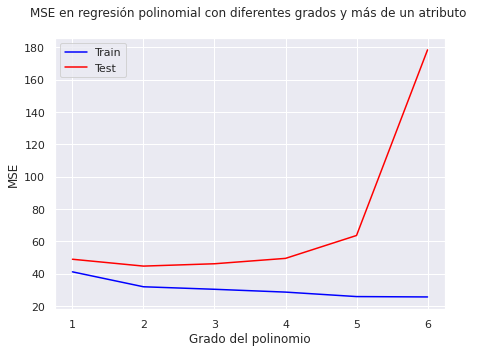

In [ ]:
# Gráfica de las curvas de error
plt.figure(figsize=(7, 5))
plt.plot(degrees[:6], train_errors_mult[:6], color="blue", label="Train")
plt.plot(degrees[:6], test_errors_mult[:6], color="red", label="Test")
plt.title("MSE en regresión polinomial con diferentes grados y más de un atributo \n")
plt.legend()
plt.xlabel("Grado del polinomio")
plt.ylabel("MSE")
plt.show()

Se grafica hasta el polinomio de grado 6 ya que a partir de este valor el error crece mucho como para poder apreciar la diferencia entre los errores de grados menores.

El mejor modelo se tiene con polinomio grado 2, ya que es donde es menor el error tanto en test como en train, a partir de ese grado, si bien el error en train disminuye, empieza a crecer el error en test y se presenta sobreajuste.

In [ ]:
# 4. Reconstruir mejor modelo
best_degree = 2
pf = PolynomialFeatures(best_degree)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train_fs, y_train)
y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)

**3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?**

- Se presenta una disminución en los errores MSE y RMSE en el modelo de regresión polinomial con un sólo atributo:
  - Modelo de regresión polinomial con un atributo (grado 2):  
    Train MSE: 37.75 - Test MSE: 39.69
    
    Train RMSE: 6.03 - Test RMSE: 6.31

  - Modelo de regresión polinomial con dos atributos (grado 2):   
    Train MSE: 31.91 - Test MSE: 44.7
    
    Train RMSE: 5.65 - Test RMSE: 6.69

  - Modelo de regresión lineal con un atributo:

    Train MSE: 42.82 - Test MSE: 46.91 
    
    Train RMSE: 6.54 - Test RMSE: 6.85

- Los errores en los conjuntos de test y train no presentan gran diferencia, por lo que el modelo no está sobreajustando los datos.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.


In [ ]:
# Elegimos los atributos:
X_train_fs = X_train[:, :]
X_test_fs = X_test[:, :]
X_train_fs.shape, X_test_fs.shape

((404, 13), (102, 13))

In [ ]:
X_train_fs

array([[3.5809e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.9170e+02,
        9.7100e+00],
       [1.5876e-01, 0.0000e+00, 1.0810e+01, ..., 1.9200e+01, 3.7694e+02,
        9.8800e+00],
       [1.1329e-01, 3.0000e+01, 4.9300e+00, ..., 1.6600e+01, 3.9125e+02,
        1.1380e+01],
       ...,
       [1.5098e-01, 0.0000e+00, 1.0010e+01, ..., 1.7800e+01, 3.9451e+02,
        1.0300e+01],
       [2.2927e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.9274e+02,
        1.8800e+01],
       [1.3914e-01, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9690e+02,
        1.4690e+01]])

In [ ]:
len(X_train_fs), len(y_train)

(404, 404)

In [ ]:
# Regresión polinomial con todos los features.
train_errors_mult = []
test_errors_mult = []
test_RMSE_mult = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # 1 Instanciar y entrenar una regresión polinomial para varios grados
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # 2 Predecir y calcular el error en entrenamiento y evaluación. Imprimir los valores.
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    train_error = mean_squared_error(y_train, y_train_pred).round(2)
    test_error = mean_squared_error(y_test, y_test_pred).round(2)
    train_RMSE_error = np.sqrt(train_error).round(2)
    test_RMSE_error = np.sqrt(test_error).round(2)
    print(f"Grado {degree} -", \
          f"Train MSE: {train_error} -", f"Test MSE: {test_error} -", \
          f"Train RMSE: {train_RMSE_error} -", f"Test RMSE: {test_RMSE_error}")
    
    # 3 Guardar los errores (MSE) en una lista:
    train_errors_mult.append(train_error)
    test_errors_mult.append(test_error)
    test_RMSE_mult.append(test_RMSE_error)

Grado 1 - Train MSE: 19.33 - Test MSE: 33.45 - Train RMSE: 4.4 - Test RMSE: 5.78
Grado 2 - Train MSE: 4.34 - Test MSE: 31.28 - Train RMSE: 2.08 - Test RMSE: 5.59
Grado 3 - Train MSE: 0.0 - Test MSE: 976575.88 - Train RMSE: 0.0 - Test RMSE: 988.22
Grado 4 - Train MSE: 0.0 - Test MSE: 950756.91 - Train RMSE: 0.0 - Test RMSE: 975.07
Grado 5 - Train MSE: 0.0 - Test MSE: 195453.64 - Train RMSE: 0.0 - Test RMSE: 442.1
Grado 6 - Train MSE: 0.0 - Test MSE: 200691.24 - Train RMSE: 0.0 - Test RMSE: 447.99
Grado 7 - Train MSE: 0.0 - Test MSE: 24919.63 - Train RMSE: 0.0 - Test RMSE: 157.86
Grado 8 - Train MSE: 0.0 - Test MSE: 142027.86 - Train RMSE: 0.0 - Test RMSE: 376.87
Grado 9 - Train MSE: 0.0 - Test MSE: 469490.98 - Train RMSE: 0.0 - Test RMSE: 685.19


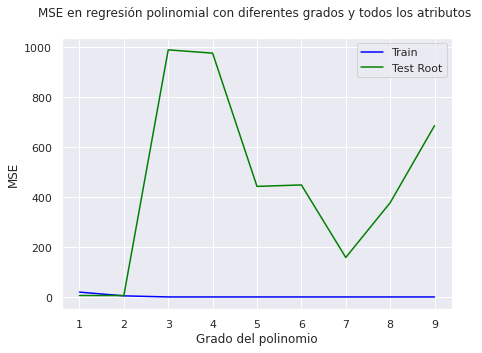

In [ ]:
# Gráfica de las curvas de error
plt.figure(figsize=(7, 5))
plt.plot(degrees, train_errors_mult, color="blue", label="Train")
#plt.plot(degrees, test_errors_mult, color="red", label="Test")
plt.plot(degrees, test_RMSE_mult, color="green", label="Test Root")
plt.title("MSE en regresión polinomial con diferentes grados y todos los atributos \n")
plt.legend()
plt.xlabel("Grado del polinomio")
plt.ylabel("MSE")
plt.show()

Observaciones de la regresión polinomial con todos los features:  
- En los resultados vemos que el mejor modelo es el que utiliza un polinomio de grado 2 porque minimiza el MSE en el conjunto de test.
- Se aprecia una mejora en los resultados de error respecto del entrenamiento con menos variables. 
- Sin embargo, debemos tener en cuenta que se utilizaron todas las variables, incluyendo las que se descartaron por ser poco éticas, por lo tanto estamos obteniendo un modelo con mucho **sesgo**.
- A medida que incrementa el grado del polinomio, el error incrementa y luego baja en grado 7 llegando a un mínimo local, para después volver a subir. El menor error está para los modelos con polinomios de grado 1 y 2.
- Es difícil determinar el porqué del comportamiento de los distintos modelos graficados. Algo a considerar es el hecho de que se usaron todas las variables de input y quizas sea demasiado complicado para explicar con un modelo polinomial.